<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en Ingeniería en Computación 
##<center>Series de Fourier 
###<center>Catedrático: Dr. Alain Manzo Martínez 
###<center>Estudiante:Ing. Luis Ángel Almazán López</center>
<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->

#Introducción 
En este trabajo se obtendran los coeficinetes de Fourier de la función:
<center>
$x(t)=t~~para~\tau=1$
</center>

Además del desarrollo mátematico se hara mostrara con un programa las gráficas de los espectros de ak, bk, así como los espectros de magnitud (|ck|) y fase (Ok) y la descripción de las mismas 

#Coeficientes de Fourier 

<center>
Coeficiente $a_o$

$a_o=\dfrac{1}{τ}∫_τ{x(t)dt}$

$=∫_0^1{tdt}$

$a_o=\left.\dfrac{t^2}{2}\right|_0^1$

$\boxed{a_o=\dfrac{1}{2}}$

Coeficiente $c_k$

$c_k=\dfrac{1}{τ}∫_τ{x(t)e^{-2i\pi f_okt}dt}$


$c_k=\left.\dfrac{t}{-2πik}e^{-2πikt}\right|_0^1+\dfrac{1}{2πik} ∫_o^1{e^{-2i\pi kt}dt}$


$c_k=\dfrac{i}{2πk}+\left.\dfrac{1}{(2πik)^2}e^{-2πikt}\right|_0^1$

$c_k=\dfrac{i}{2πk}+\dfrac{1}{(2πik)^2}(1-1)$

$\boxed{c_k=\dfrac{i}{2πk}}$

Coeficientes $a_k$ y $b_k $

$c_k=\dfrac{a_k}{2}-\dfrac{b_k }{2}i$

$\boxed{a_k=0,~b_k=-\dfrac{1}{πk}}$



</center>



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warni

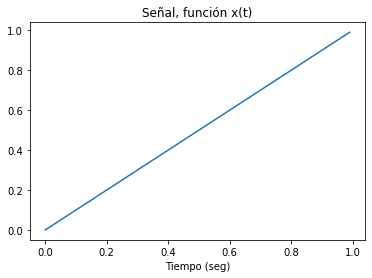

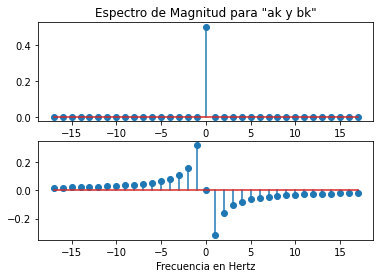

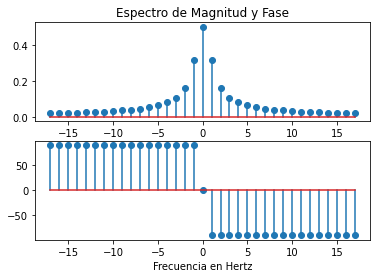

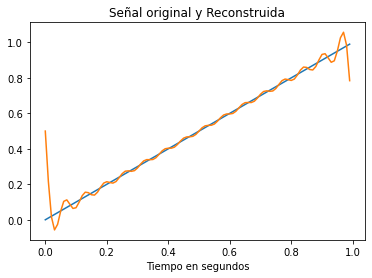

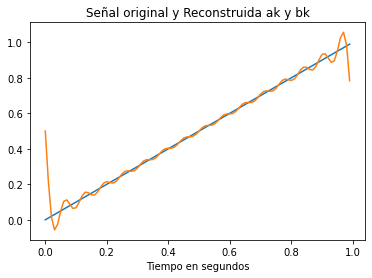

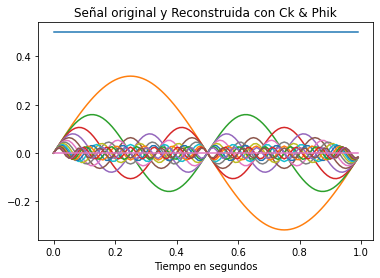

In [ ]:
# =============================================================================
#                      Librerías 
# =============================================================================
#Librerías con las que se trabajara:
import numpy as np
import matplotlib.pyplot as plt
import sys

# =============================================================================
#                      DEFINIR FUNCIÓN 
# =============================================================================
#
#     
#x(t)=t, para 0<t<1
#     
#
#Incremento de tiempo 
dt = 0.01

#Tiempo inicial 

t_min =0

#Tiempo final

t_max = 1

#Vector de tiempos 
t = np.arange(t_min,t_max,dt)
xt = t
#Tamaño del vector de tiempos
L=len(t)
#Gráfico
plt.figure(1)
plt.plot(t,xt)
plt.title("Señal, función x(t)")
plt.xlabel("Tiempo (seg)")

# =============================================================================
#                       ANÁLISIS DE FRECUENCIA
# =============================================================================
#Periodo de la señal
T=t_max-t_min
#Frecuecnía fundamental
fo=1/T
#Coeficiente a0 (Offset)
a0=1/2
#Definición de armónicos 
K= 16
#Incializar vectores para ak,bk,phik y ck
ak= np.zeros(2*K + 3)
bk= np.zeros(2*K + 3)
ck= np.zeros(2*K + 3)
phik= np.zeros(2*K + 3)
#Vector de frecuencia
f= np.zeros(2*K + 3)
#Cálculo de los coeficientes de Fourier
for k in range(-K-1,K+2):
    
    #Verifica signo de la componente de offset
    if a0 < 0:
        phik[k+K+1] = np.pi 
    else:
        phik[k+K+1] = 0
    
    #Caso cuando k = 0
    if k == 0:
        ak[k+K+1] = a0
        ck[k+K+1] = np.abs(a0)          
        
    else:
        ak[k+K+1] = sys.float_info.epsilon 
        #Para resolver el problema de "NAN" "no a number"
        #epsilon = 2.22 e-16 aproximado a 0
        bk[k+K+1] = -1/(k*np.pi)
        ck[k+K+1] = np.sqrt(ak[k+K+1]**2 + bk[k+K+1]**2)
        
        #Cómputo del ángulo 
        #Primer cuadrante
        if ak[k+K+1] >= 0 and bk[k+K+1] >= 0:
            phik[k+K+1] = np.arctan(bk[k+K+1]/ak[k+K+1])
        
        #Segundo cuadrante
        if ak[k+K+1] <= 0 and bk[k+K+1] >= 0:
            phik[k+K+1] = np.pi - np.arctan(abs(bk[k+K+1])/np.abs(ak[k+K+1]))

        #Tercer cuadrante
        if ak[k+K+1] <= 0 and bk[k+K+1] <= 0:
            phik[k+K+1] = -np.pi + np.arctan(np.abs(bk[k+K+1])/np.abs(ak[k+K+1]))

        #Cuarto cuadrante
        if ak[k+K+1] >= 0 and bk[k+K+1] <= 0:
            phik[k+K+1] = np.arctan((bk[k+K+1])/(ak[k+K+1]))

        #Cálculo de las Frecuencias
        f[k+K+1] = k*fo
        
        #ángulo en grados
        phik[k+K+1] = phik[k+K+1]*180/np.pi 
        
        
#Gráfico
plt.figure(2)
plt.subplot(2,1,1)
plt.stem(f,ak)
plt.title('Espectro de Magnitud para "ak y bk"')
plt.subplot(2,1,2)

plt.stem(f,bk)
plt.xlabel('Frecuencia en Hertz')

plt.figure(3)
plt.subplot(2,1,1)
plt.stem(f,ck)
plt.title('Espectro de Magnitud y Fase')
plt.subplot(2,1,2)
plt.stem(f,phik)
plt.xlabel('Frecuencia en Hertz')


# =============================================================================
#                   RECONSTRUCCIÓN DE LA SEÑAL}

# =============================================================================
#Vector para la señal reconstruída

xr= np.zeros(L)
#Evaluamos la serie de Fourier Rectangular
for k in range(1,K):
    xr= xr + ak[k+K+1]*np.cos(2*np.pi*k*fo*t)*0 + bk[k+K+1]*np.sin(2*np.pi*k*fo*t)


#Agregar offset
xr=xr+a0

#GRÁFICO

plt.figure(4)
plt.plot(t,xt,t,xr)    
plt.title("Señal original y Reconstruida")
plt.xlabel("Tiempo en segundos")


#Vector para la señal reconstruída 2

xp= np.zeros(L)
#Matriz de sonoides

senoides = np.zeros((K+2,L))


#Evaluamos la serie de Fourier Polar
for k in range(1,K):

    xp= xp + ck[k+K+1]*np.cos(2*np.pi*k*fo*t-phik[k+K+1]*np.pi/180)

    senoides[k,:]=ck[k+K+1]*np.cos(2*np.pi*k*fo*t+phik[k+K+1]*np.pi/180)



#Agregar offset
xp=xp+a0

#Poner offset en senoides

senoides[0,:] = a0 

#GRÁFICO

plt.figure(5)
plt.plot(t,xt,t,xp)    
plt.title("Señal original y Reconstruida ak y bk")
plt.xlabel("Tiempo en segundos")

plt.figure(6)
for k in range(0,k+2):
    plt.plot(t,senoides[k,:])    
    plt.title("Señal original y Reconstruida con Ck & Phik")
    plt.xlabel("Tiempo en segundos")









#Descripción de resultados de las gráficas de espectros de magnitud $a_k$ y $b_k$ y espectros de magnitud $|C_k|$ y fase $\theta _k$.


##Espectros de magnitud $a_k$ y $b_k$.


Como se puder observar en las gráficas y de los resultados obtenidos algebraicamente: $a_o=\dfrac{1}{2},~$$a_k=0,~b_k=\dfrac{1}{πk}$

*  Donde $a_o$ es el $offset$ de la serie, es decir el desplazamiento vertical, al ser un valor constante en la serie.
*  Donde $a_k$ nos da el valor de coeficientes de las componentes de $coseno$ de la serie con argumento $2\pi k f_o t$.

*  Donde $b_k$ nos da el valor de coeficientes de las componentes de $seno$ de la serie con argumento $2\pi k f_o t$.







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


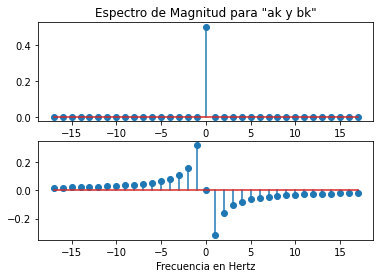

In [ ]:
#Gráfico
plt.figure(2)
plt.subplot(2,1,1)
plt.stem(f,ak)
plt.title('Espectro de Magnitud para "ak y bk"')
plt.subplot(2,1,2)

plt.stem(f,bk)
plt.xlabel('Frecuencia en Hertz')
plt.show()

##Espectros de magnitud $|C_k|$ y fase $\theta _k$.

Es posible expresar lo anterior de forma polar, como la suma de las componentes $seno$ y $coseno$ con un mismo argumento, se pueden expresar como una sola senoide con un angulo de fase $\theta_k$, es decir:
<center>
$a_k \cos (ω_k t)+b_k \sin (ω_k t)=c_k \cos (ω_k t+\theta _k)$

$c_k= 	\sqrt{a_k^2+b_k^2}$

$\theta = arctg{(  \dfrac{bn}{an} )}$

En este caso como $a_k =0$, la componente de $c_k=|b_k|$ excepto para en $k=0$ donde, ya que  $a_0\not=0$, debido a esto, el ángulo para $k\not=0$ sera siempre sera $θ_k=π/2~(rad)=90^º$


</center>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


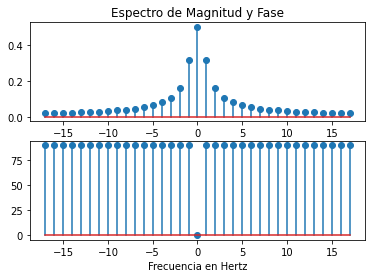

In [ ]:
plt.figure(3)
plt.subplot(2,1,1)
plt.stem(f,ck)
plt.title('Espectro de Magnitud y Fase')
plt.subplot(2,1,2)
plt.stem(f,phik)
plt.xlabel('Frecuencia en Hertz')
plt.show()

#Conclusiones 
Sin duda las series de Fourier son una herramienta muy poderosa en cuanto a procesamiento de señales se refiere, ya que permiten descomponer una señal en una suma infinita de senoides, aunque para aplicaciones se hace de manera finita.